# Multi-Output Text Classification
* Notebook by Adam Lang
* Date 7/5/2024

# Overview
* In this notebook we will demonstrate **Multi-Output Text Classification**.
* We will use the well known dataset from Kaggle "Netflix Movies and TV Shows" Dataset.
* Dataset link: https://www.kaggle.com/datasets/shivamb/netflix-shows

# Classification/Prediction Problem
* We will build machine learning models to predict multiple classes and labels at the same time.

## What Exactly is Multi-Output Text Classification?
1. Binary Classification
  * Target is 0 or 1
2. Multi-Class
  * Classificaiton of more than 2 classes.
  * **Each element can only belong to 1 class at a time.*
  * Example: Sentiment Analysis
      * Classes: Positive | Neutral | Negative
3. Multi-Label
  * Target can have more than 2 labels at the same time!
  * Example: Dataset with Q & A
      * Each question can have more than 1 label assigned to it.
      * For example if it were a question about programming, it could have more than 2 programming languages in the same question (e.g. Python, SQL, etc..)
4. **Multi-Output**
  * Target where each sample has multiple classification/regression labels.
      * Multiclass-Multioutput Classification (or Multitask Classification)
          * Task which classifies which labels each sample of data with a set of non-binary properties.
      * Both the number of properties and number of classes per property is greater than 2.
  * Predicting 2 different output Classes or Labels at the same time!!
      * Example:
          * Sentiment
          * Emotion

  * Example:

  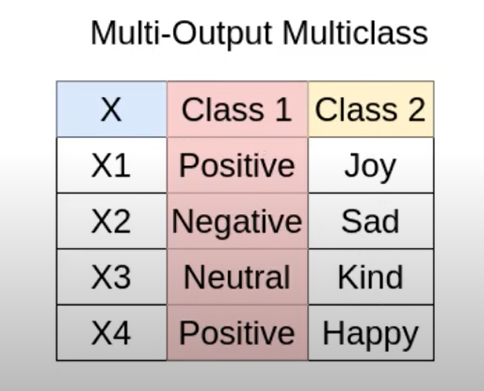

* Another Example
  * If you are predicting Movies, it can be:
  1. Multi-Class (e.g. TV Show, Movie)
  2. Multi-Label (e.g. action, romance, crime)

* Multi-Class


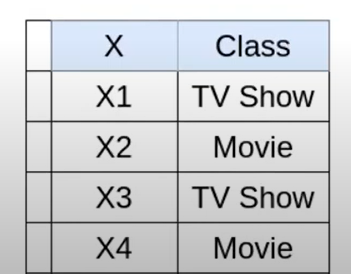

* Multi-Label
  * The idea here is that multiple labels can be assigned to the same variable.
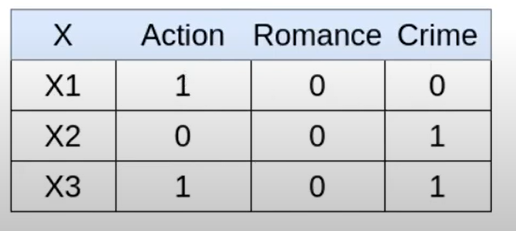


* Multi-Output Multiclass

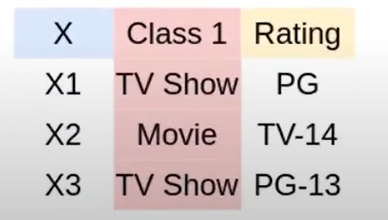

  * Multi-Output Multiclass is predicting 2 different outputs **simultaneously**.

# Multi-Output Text Classification Using Sklearn in Python

In [1]:
## import EDA libraries
import pandas as pd
import numpy as np


## import data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## machine learning packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# upgrade sckit learn
#!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
## feature extraction and evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Dataset upload

In [3]:
# data path
data_path = '/content/drive/MyDrive/Colab Notebooks/LangChain/netflix_titles.csv'

In [4]:
# read in the data
df = pd.read_csv(data_path)

# df head
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
## columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
## info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
## view a subset for prediction task
df[['title', 'type','rating','listed_in']]

,title,type,rating,listed_in
0,Dick Johnson Is Dead,Movie,PG-13,Documentaries
1,Blood & Water,TV Show,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,TV Show,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,TV Show,TV-MA,"Docuseries, Reality TV"
4,Kota Factory,TV Show,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,Zodiac,Movie,R,"Cult Movies, Dramas, Thrillers"
8803,Zombie Dumb,TV Show,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Zombieland,Movie,R,"Comedies, Horror Movies"
8805,Zoom,Movie,PG,"Children & Family Movies, Comedies"


In [8]:
## create a new df subset
df2 = df[['title', 'description', 'type','rating']]
df2.head()

,title,description,type,rating
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Movie,PG-13
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",TV Show,TV-MA
2,Ganglands,To protect his family from a powerful drug lor...,TV Show,TV-MA
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",TV Show,TV-MA
4,Kota Factory,In a city of coaching centers known to train I...,TV Show,TV-MA


Summary:
* The prediction task is to predict the **type** and **rating** at the same time given the description and title.

## Exploratory Data Analysis - EDA
* Target/Class/Output #1 Distribution is 'Type'

In [9]:
## class distribution for Type
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

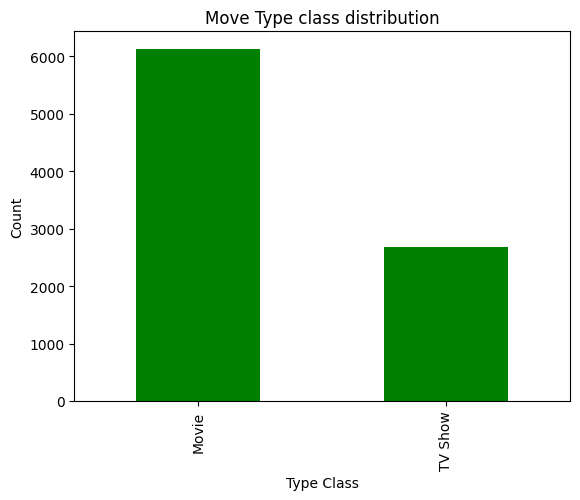

In [10]:
## plot type class
df['type'].value_counts().plot(kind='bar',color='green')
plt.title("Move Type class distribution")
plt.xlabel('Type Class')
plt.ylabel("Count")
plt.show();

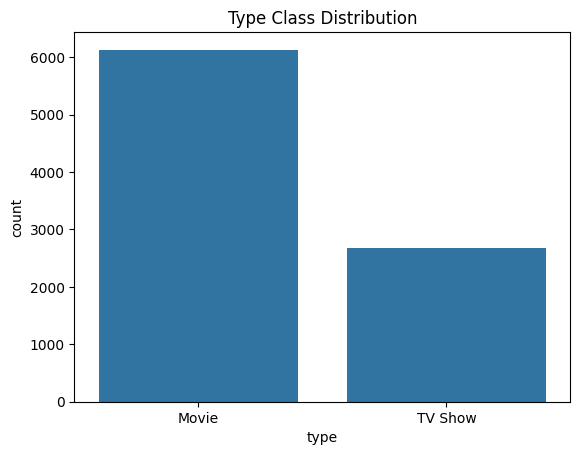

In [11]:
## we can also make a countplot
sns.countplot(x='type',data=df).set(title='Type Class Distribution')
plt.show();

* Target/Class/Output 2 Distribution is 'Rating'

In [12]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

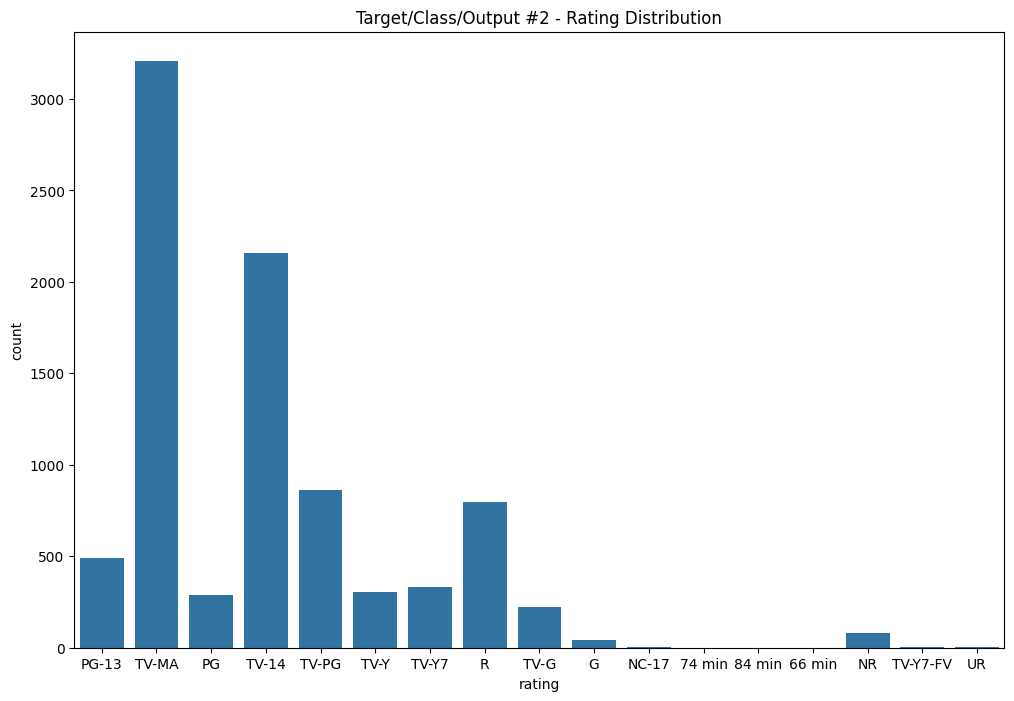

In [13]:
## plot it with seaborn countplot()
fig = plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df).set(title='Target/Class/Output #2 - Rating Distribution')
plt.show();

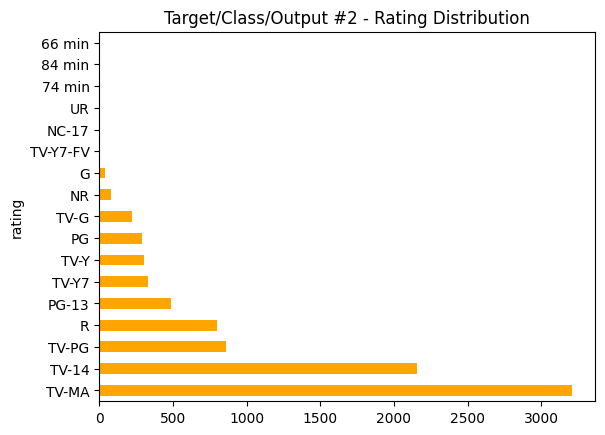

In [14]:
# plot this with value_counts
df['rating'].value_counts().plot(kind='barh',color='orange')
plt.title('Target/Class/Output #2 - Rating Distribution')
plt.show();

Summary:
* Now we can see the distribution of both target/class/outputs we are trying to predict.

# Multioutput Classifiers with sklearn
* sklearn documentation: https://scikit-learn.org/stable/modules/multiclass.html

* This is the source flow diagram from the sckikit-learn documentation that explains what we are doing:

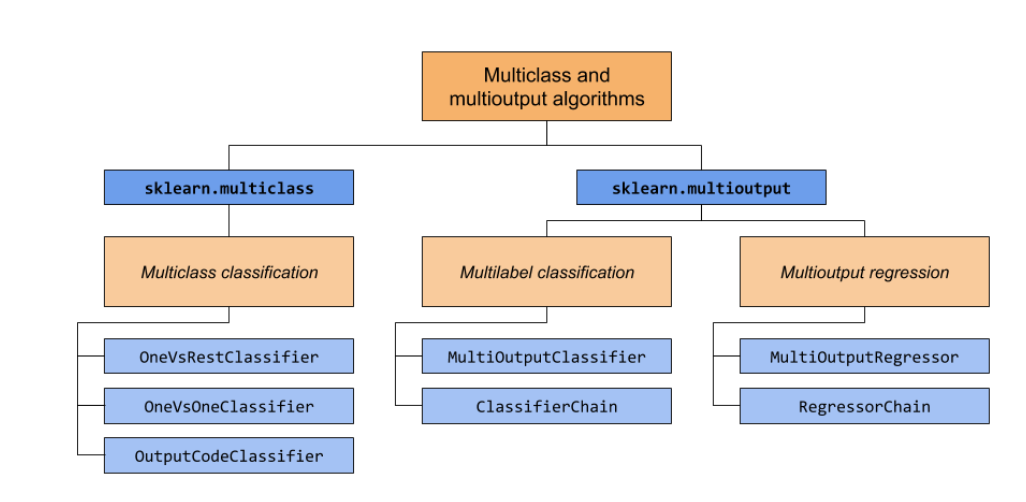

* A more detailed table that describes use cases (from sklearn docs):

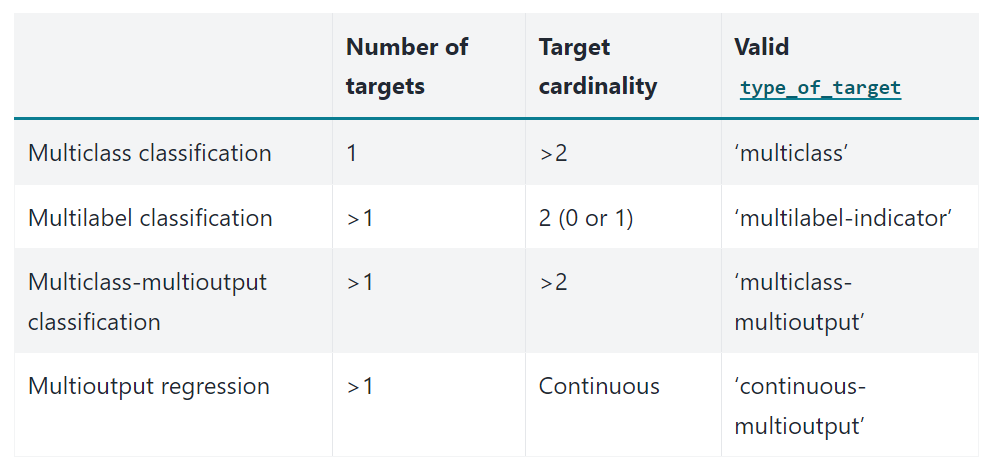

* Note: Multilabel can also be Multioutput classification as we see above.

In [15]:
## load packages from sklearn
from sklearn.multioutput import MultiOutputClassifier

## Text Cleaning
* Important step prior to modeling.

In [18]:
## let's look at the dataframe again
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


* Text normalization would be a good idea expecially for classical machine learning algorithms for text classification.
* As a reminder, above we discussed using the following variables in our prediction task:
1. Title
2. Description
3. Type
4. Rating


In [19]:
## converting the title of the movie to lower()
x_func = lambda x: x.lower()
df['title'] = df['title'].apply(x_func)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
## check null values
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

* It seems we have 4 null values in the rating column which we are using as a label. Let's drop these as its only 4.

In [21]:
## drop the null rows in rating column
df.dropna(subset=['rating'], inplace=True)

In [22]:
## check nulls again
df.isnull().sum().sort_values(ascending=False)

director        2631
country          830
cast             825
date_added        10
duration           3
show_id            0
type               0
title              0
release_year       0
rating             0
listed_in          0
description        0
dtype: int64

* Great we removed the null values from the `rating` column.

## Feature Engineering
* Features & Labels

In [23]:
## X features and y labels
X_features = df['title']
y_labels = df[['type', 'rating']]

In [24]:
## view the X_features
X_features[:10]

0                dick johnson is dead
1                       blood & water
2                           ganglands
3               jailbirds new orleans
4                        kota factory
5                       midnight mass
6    my little pony: a new generation
7                             sankofa
8       the great british baking show
9                        the starling
Name: title, dtype: object

In [25]:
## lets view the y labels
y_labels[:10]

,type,rating
0,Movie,PG-13
1,TV Show,TV-MA
2,TV Show,TV-MA
3,TV Show,TV-MA
4,TV Show,TV-MA
5,TV Show,TV-MA
6,Movie,PG
7,Movie,TV-MA
8,TV Show,TV-14
9,Movie,PG-13


In [27]:
## instantiate the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=42)

### Building a Text Classification Model Pipeline

In [70]:
# instantiate the pipeline
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()),
                          ('lr_multi', MultiOutputClassifier(LogisticRegression(penalty='l2',solver='saga', random_state=42, max_iter=100)))]) #classifier we are using

In [71]:
## Fit to data
pipe_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression(random_state=42,
                                                                    solver='saga')))])

In [72]:
## accuracy score
pipe_lr.score(X_test, y_test)

0.2586141613025369

In [73]:
## Sample prediction
print("Test movie title: ",X_test.iloc[0])
print("Actual Prediction: ", y_test.iloc[0])

Test movie title:  the circle
Actual Prediction:  type      TV Show
rating      TV-MA
Name: 95, dtype: object


In [74]:
ex1 = X_test.iloc[0]

In [75]:
# predict with model
pipe_lr.predict([ex1])

array([['Movie', 'TV-MA']], dtype=object)

In [76]:
# prediction prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

[array(['Movie', 'TV Show'], dtype=object), array(['66 min', '74 min', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R',
       'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV',
       'UR'], dtype=object)]


[array([[0.66500644, 0.33499356]]),
 array([[0.00108119, 0.00073403, 0.00551166, 0.00112793, 0.00510548,
         0.02666965, 0.05722041, 0.07076173, 0.34809271, 0.0152623 ,
         0.39226719, 0.04702686, 0.01433596, 0.0122959 , 0.001359  ,
         0.001148  ]])]

## Machine Learning Estimators that support multi-output classification
+ KNN
+ Random Forest
+ Decision Trees

In [77]:
# KNN
pipe_knn = Pipeline(steps=[('cv', CountVectorizer()), ('knn', MultiOutputClassifier(KNeighborsClassifier(n_neighbors=4)))])

In [78]:
## fit knn pipe
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('knn',
                 MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=4)))])

In [79]:
# predict knn
pipe_knn.predict([ex1])

array([['Movie', 'TV-MA']], dtype=object)

Summary:
* This was the same prediction as the logistic regression model.

In [80]:
## accuracy score for knn
pipe_knn.score(X_test, y_test)

0.21772056039379023

# Summary
* This was an experiment using multi output classification.
* As you can see the accuracy was not that great. There are some things we can do to improve the predictions, including but not limited to:
  * 1. Improve the text cleaning strategies (i.e. stop word removal, normalize all text, create embeddings, use more variables)
  * 2. Perform Grid Search rather than using default or guessing the parameters.
  * 3. Use other classifiers or ensemble modeling like XGBoost.